## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif
import seaborn as sns


from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


## Dataset

In [2]:
df = pd.read_csv('Chronic_kidney_disease.csv')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,0,0,1,1,121,...,44,7800,5.2,0,0,1,1,1,1,ckd
1,7,50,1.02,4,0,0,0,1,1,?,...,38,6000,0.0,1,1,1,1,1,1,ckd
2,62,80,1.01,2,3,0,0,1,1,423,...,31,7500,0.0,1,0,1,0,1,0,ckd
3,48,70,1.005,4,0,0,1,0,1,117,...,32,6700,3.9,0,1,1,0,0,0,ckd
4,51,80,1.01,2,0,0,0,1,1,106,...,35,7300,4.6,1,1,1,1,1,1,ckd


In [3]:
df.shape

(400, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    object 
 1   bp      400 non-null    object 
 2   sg      400 non-null    object 
 3   al      400 non-null    object 
 4   su      400 non-null    object 
 5   rbc     400 non-null    int64  
 6   pc      400 non-null    int64  
 7   pcc     400 non-null    int64  
 8   ba      400 non-null    int64  
 9   bgr     400 non-null    object 
 10  bu      400 non-null    object 
 11  sc      400 non-null    object 
 12  sod     400 non-null    object 
 13  pot     400 non-null    object 
 14  hemo    400 non-null    object 
 15  pcv     400 non-null    int64  
 16  wbcc    400 non-null    int64  
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    int64  
 19  dm      400 non-null    int64  
 20  cad     400 non-null    int64  
 21  appet   400 non-null    int64  
 22  pe

In [5]:
df.describe()

,rbc,pc,pcc,ba,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.117500,0.190000,0.885000,0.935000,31.982500,6178.500000,3.16575,0.627500,0.645000,0.905000,0.792500,0.807500,0.847500
std,0.322418,0.392792,0.319421,0.246835,16.962799,4490.489839,2.36621,0.484076,0.479113,0.293582,0.406024,0.394757,0.359955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,26.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,0.000000,1.000000,1.000000,37.000000,6900.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,0.000000,0.000000,1.000000,1.000000,44.000000,9400.000000,5.10000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,54.000000,26400.000000,8.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# prof = df.profile_report(title='Pandas Profiling Report')
# prof.to_file(output_file="ckdreport.html")

## Analying Data

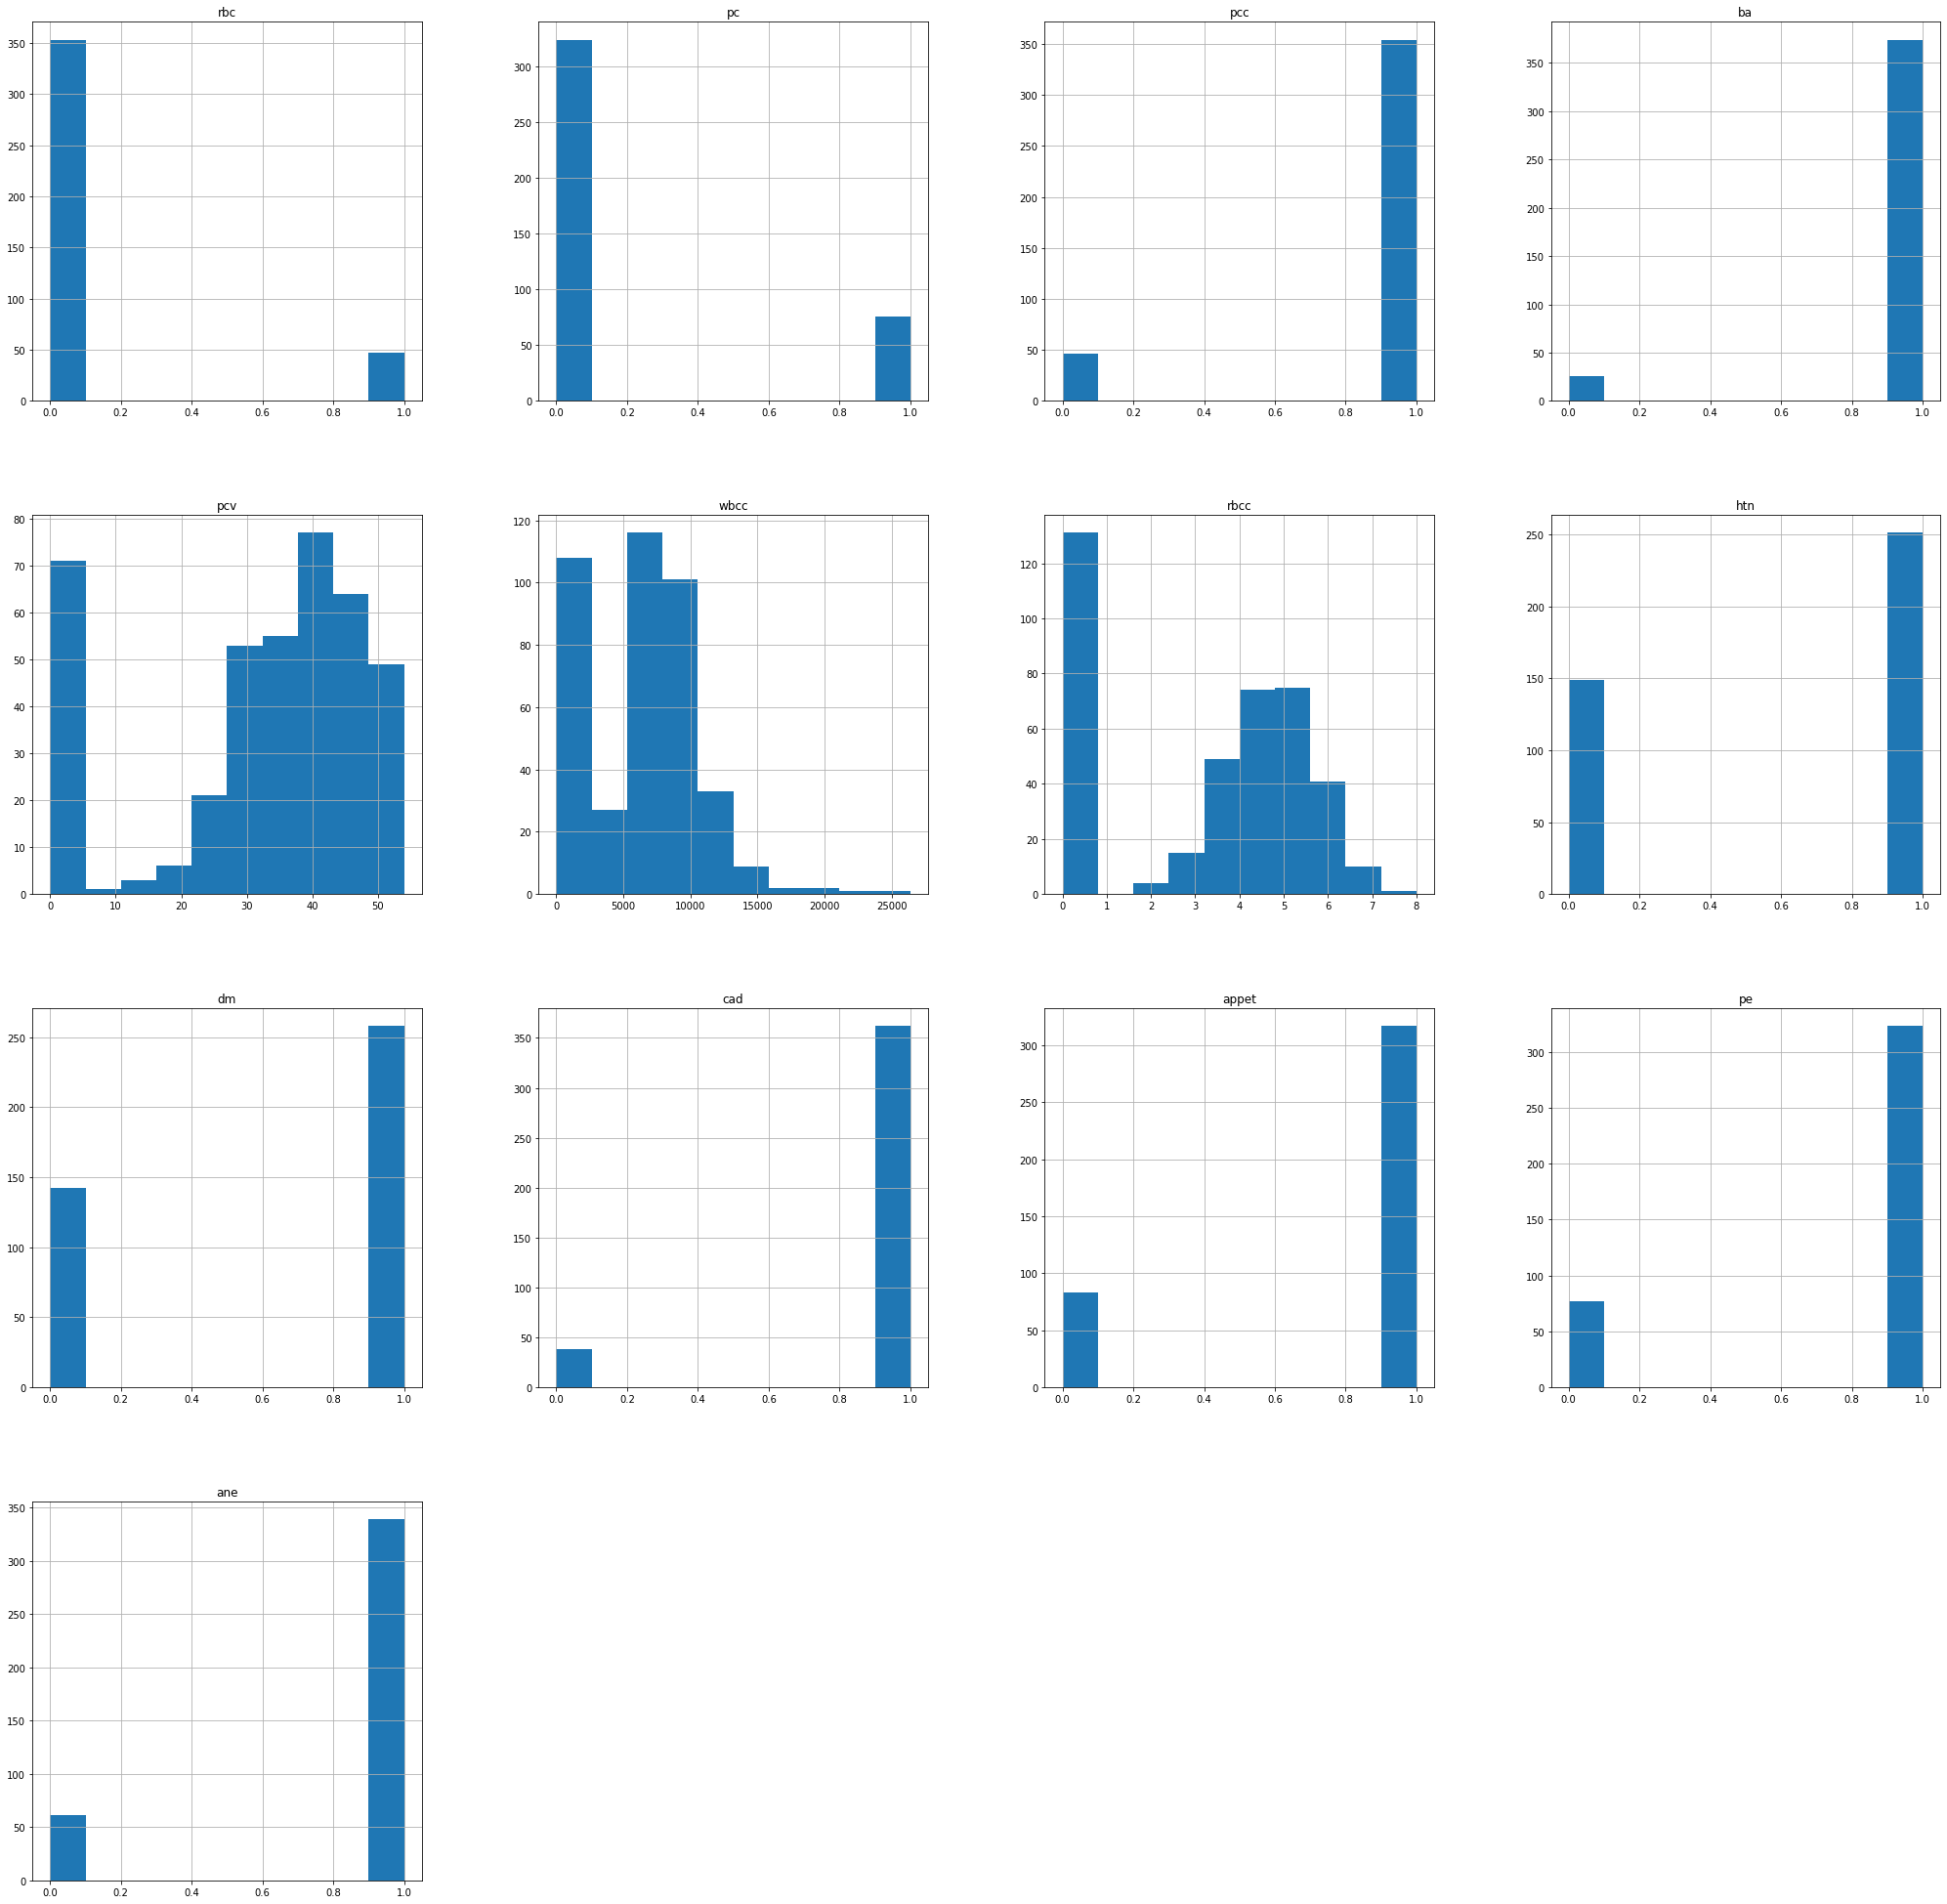

In [11]:
df.hist(figsize = (35,35))
plt.show()

## Data Preprocessing

In [7]:
try:
    #Description of Datasets
    #Print number of records and attributes of whole kidney dataset
    print('Shape of dataset: ' + str(df.shape))
    print('Total number of records in dataset = ' + str(df.shape[0]))
    print('Total number of attributes in dataset = ' + str(df.shape[1]))
    print('')
    
    
    df = df.replace('?', np.nan)
    
    #set the features and the target variables
    target_class = df['class']
    
    feature_classes = df.iloc[:, 0:24]
    
    
#     KNN imputation (n_neighbour = 5 means that the missing values will be replaced by the mean value of 5 nearest neighbors)
    knn_missing_values_imputer = KNNImputer(n_neighbors=5)
    feature_classes = pd.DataFrame(knn_missing_values_imputer.fit_transform(feature_classes),
                                   columns = feature_classes.columns)

    target_label_encoder = preprocessing.LabelEncoder()
    target_class = target_label_encoder.fit_transform(target_class)
    target_class1 = pd.DataFrame(target_class, columns=['class'])
    print(target_class1)

                                                      
except FileNotFoundError as e:
    logging.error(e)

Shape of dataset: (400, 25)
Total number of records in dataset = 400
Total number of attributes in dataset = 25

     class
0        0
1        0
2        0
3        0
4        0
..     ...
395      1
396      1
397      1
398      1
399      1

[400 rows x 1 columns]


## Feature Selection

## Method-1 Using Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(feature_classes,target_class)

RandomForestClassifier()

In [9]:
feat_importances = pd.Series(model.feature_importances_, index=feature_classes.columns)
for i in range(5,11):
    feat_importances.nlargest(i).plot(kind='barh')
    print(feat_importances.nlargest(i))
    plt.show()

hemo    0.228557
pcv     0.152027
sg      0.124400
sc      0.111288
rbcc    0.088373
dtype: float64
hemo    0.228557
pcv     0.152027
sg      0.124400
sc      0.111288
rbcc    0.088373
al      0.068269
dtype: float64
hemo    0.228557
pcv     0.152027
sg      0.124400
sc      0.111288
rbcc    0.088373
al      0.068269
bgr     0.037948
dtype: float64
hemo    0.228557
pcv     0.152027
sg      0.124400
sc      0.111288
rbcc    0.088373
al      0.068269
bgr     0.037948
htn     0.037811
dtype: float64
hemo    0.228557
pcv     0.152027
sg      0.124400
sc      0.111288
rbcc    0.088373
al      0.068269
bgr     0.037948
htn     0.037811
bu      0.032958
dtype: float64
hemo    0.228557
pcv     0.152027
sg      0.124400
sc      0.111288
rbcc    0.088373
al      0.068269
bgr     0.037948
htn     0.037811
bu      0.032958
dm      0.031138
dtype: float64


## Method-2 Selectkbest

In [10]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(feature_classes,target_class)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(feature_classes.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [11]:
for i in range(5,11):
    print("\nTop "+str(i)+" Features\n")
    print(featureScores.nlargest(i,'Score'))
    


Top 5 Features

   Specs       Score
14  hemo  558.308298
2     sg  413.050584
17  rbcc  280.783698
3     al  236.151572
15   pcv  223.587689

Top 6 Features

   Specs       Score
14  hemo  558.308298
2     sg  413.050584
17  rbcc  280.783698
3     al  236.151572
15   pcv  223.587689
18   htn  197.036645

Top 7 Features

   Specs       Score
14  hemo  558.308298
2     sg  413.050584
17  rbcc  280.783698
3     al  236.151572
15   pcv  223.587689
18   htn  197.036645
19    dm  175.397966

Top 8 Features

   Specs       Score
14  hemo  558.308298
2     sg  413.050584
17  rbcc  280.783698
3     al  236.151572
15   pcv  223.587689
18   htn  197.036645
19    dm  175.397966
9    bgr   83.762171

Top 9 Features

    Specs       Score
14   hemo  558.308298
2      sg  413.050584
17   rbcc  280.783698
3      al  236.151572
15    pcv  223.587689
18    htn  197.036645
19     dm  175.397966
9     bgr   83.762171
21  appet   68.678957

Top 10 Features

    Specs       Score
14   hemo  558.308298
2  

## Splitting Dataset

In [12]:
train_features, test_features, train_target, test_target = train_test_split(feature_classes, target_class, 
                                                                                train_size = 0.7, test_size = 0.3, random_state = 42)
print('\nAfter Pre-processing:')
print('Size of train dataset: ' + str(train_target.shape[0]))
print('Size of test dataset: ' + str(test_target.shape[0]))


After Pre-processing:
Size of train dataset: 280
Size of test dataset: 120


In [13]:
train_features

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
157,62.0,70.0,1.025,3.0,0.0,0.0,1.0,1.0,1.0,122.0,...,12.6,39.0,7900.0,3.9,0.0,0.0,1.0,1.0,1.0,1.0
109,54.0,70.0,1.014,1.6,1.8,0.0,0.0,1.0,1.0,233.0,...,11.7,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
17,47.0,80.0,1.016,0.8,0.4,0.0,0.0,1.0,1.0,114.0,...,12.1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
347,43.0,60.0,1.025,0.0,0.0,0.0,0.0,1.0,1.0,108.0,...,17.8,43.0,7200.0,5.5,1.0,1.0,1.0,1.0,1.0,1.0
24,42.0,100.0,1.015,4.0,0.0,0.0,1.0,1.0,0.0,156.4,...,11.1,39.0,8300.0,4.6,0.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,46.0,60.0,1.010,1.0,0.0,0.0,0.0,1.0,1.0,163.0,...,9.8,28.0,14600.0,3.2,0.0,0.0,1.0,1.0,1.0,1.0
106,50.0,90.0,1.018,0.6,0.0,0.0,0.0,1.0,1.0,89.0,...,6.0,17.0,6500.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
270,23.0,80.0,1.025,0.0,0.0,0.0,0.0,1.0,1.0,111.0,...,14.3,41.0,7200.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0
348,38.0,80.0,1.020,0.0,0.0,0.0,0.0,1.0,1.0,99.0,...,13.6,44.0,7300.0,6.4,1.0,1.0,1.0,1.0,1.0,1.0


## Feature Scaling

In [14]:
try:
    #Scaling and normalization of features
    standard_feature_scaler = StandardScaler()
    train_features = standard_feature_scaler.fit_transform(train_features)
    train_features = pd.DataFrame(train_features, columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 
                                                             'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 
                                                             'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 
                                                             'cad', 'appet', 'pe', 'ane'])
    test_features  = standard_feature_scaler.transform(test_features)
    test_features = pd.DataFrame(test_features, columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 
                                                             'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 
                                                             'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 
                                                             'cad', 'appet', 'pe', 'ane'])
except FileNotFoundError as e:
    logging.error(e)

In [15]:
print(standard_feature_scaler.fit_transform(test_features))

[[-1.97238883 -0.60956815  0.5296106  ...  0.46056619  0.52592371
   0.46056619]
 [-0.25975019  0.21417259  0.16748369 ...  0.46056619  0.52592371
   0.46056619]
 [ 0.53540346  1.86165408  0.5296106  ... -2.17124059  0.52592371
   0.46056619]
 ...
 [ 0.90239745 -0.60956815  0.5296106  ...  0.46056619  0.52592371
   0.46056619]
 [-0.62674419  0.21417259  0.5296106  ...  0.46056619  0.52592371
   0.46056619]
 [ 0.22957513  0.21417259  1.43492787 ...  0.46056619  0.52592371
   0.46056619]]


In [16]:
print(standard_feature_scaler.fit(test_features))

StandardScaler()


In [17]:
test_features

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,-1.872236,-0.429337,0.490370,-0.788128,-0.432768,-0.339909,-0.460566,0.346410,0.27735,0.552025,...,-0.269496,-1.877104,0.190581,-1.316487,0.762837,0.774597,0.319941,0.533295,0.471919,0.408248
1,-0.256747,0.283678,0.124715,-0.788128,-0.432768,-0.339909,-0.460566,0.346410,0.27735,-0.782344,...,0.375391,1.170129,0.452698,0.873146,0.762837,0.774597,0.319941,0.533295,0.471919,0.408248
2,0.493301,1.709707,0.490370,0.741157,-0.432768,2.941967,2.171241,0.346410,0.27735,-0.144993,...,-0.771075,-0.177686,-1.316592,-1.316487,-1.310895,0.774597,0.319941,-1.875134,0.471919,0.408248
3,0.435605,1.709707,-0.423769,2.270442,1.524825,-0.339909,-0.460566,0.346410,0.27735,1.414484,...,-1.774232,-0.705091,0.824031,0.325738,-1.310895,-1.290994,-3.125577,0.533295,0.471919,-2.449490
4,1.243349,1.709707,-1.337908,1.505800,1.524825,2.941967,2.171241,-2.886751,0.27735,1.956910,...,-1.093518,-0.119085,0.212424,0.030980,-1.310895,-1.290994,-3.125577,-1.875134,0.471919,0.408248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.897173,0.996692,0.490370,-0.023485,-0.432768,-0.339909,2.171241,-2.886751,0.27735,-0.131432,...,-0.720917,-1.877104,-1.316592,-1.316487,-1.310895,0.774597,0.319941,0.533295,0.471919,0.408248
116,0.262517,0.283678,-1.337908,-0.023485,-0.432768,-0.339909,-0.460566,0.346410,0.27735,0.194024,...,0.447045,0.466922,1.260892,0.788930,-1.310895,-1.290994,0.319941,-1.875134,-2.119008,0.408248
117,0.839477,-0.429337,0.490370,-0.788128,-0.432768,-0.339909,-0.460566,0.346410,0.27735,-0.768783,...,1.342721,0.525522,-0.158908,1.167905,0.762837,0.774597,0.319941,0.533295,0.471919,0.408248
118,-0.602923,0.283678,0.490370,-0.788128,-0.432768,-0.339909,-0.460566,0.346410,0.27735,-0.389084,...,1.736819,0.525522,0.671129,0.873146,0.762837,0.774597,0.319941,0.533295,0.471919,0.408248


In [19]:
# featureScores.nlargest(5,'Score').iloc[:,0:1]
# featureScores.nlargest('Specs')

# for i in range(5,11):
#     f = featureScores.nlargest(i,'Score').iloc[:,0:1]
#     t = train_features[f["Specs"].tolist()]
#     print(t)
    
# for i in range(5,11):
#     print('The no of features are \n ' +str(i))
#     f = featureScores.nlargest(i,'Score').iloc[:,0:1]
#     tr = train_features[f["Specs"].tolist()]
#     ts = test_features[f["Specs"].tolist()]
#     print(tr)
#     print(ts)
    
# print(feat_importances.nlargest(i).index)
for i in range(5,11):
    print('The no of features are \n ' +str(i))
    f = feat_importances.nlargest(i).index
    print(f)
    tr = train_features[f.tolist()]
    ts = test_features[f.tolist()]
    print(tr)
    print(ts)


The no of features are 
 5
Index(['hemo', 'pcv', 'rbcc', 'sc', 'sg'], dtype='object')
         hemo       pcv      rbcc        sc        sg
0    0.124601  0.408321  0.325738 -0.226819  1.404509
1   -0.197842 -1.877104 -1.316487 -0.191919 -0.606597
2   -0.054534 -1.877104 -1.316487  0.383931 -0.240941
3    1.987608  0.642724  0.999471 -0.348968  1.404509
4   -0.412804  0.408321  0.620496 -0.279169 -0.423769
..        ...       ...       ...       ...       ...
275 -0.878556 -0.236286  0.030980  0.052381 -1.337908
276 -2.239984 -0.880893 -1.316487  0.540981  0.124715
277  0.733661  0.525522  0.788930 -0.331518  1.404509
278  0.482872  0.701324  1.378446 -0.436218  0.490370
279  0.590353  1.170129 -1.316487 -0.157019 -1.337908

[280 rows x 5 columns]
         hemo       pcv      rbcc        sc        sg
0   -0.265758 -1.913880 -1.396007 -0.164989  0.529611
1    0.354019  1.209188  0.832462 -0.433445  0.167484
2   -0.747807 -0.172169 -1.396007 -0.135160  0.529611
3   -1.711905 -0.712700  0

## Machine Learning Models

In [18]:
#Support vector machine


#initialise the Support Vector Model
support_vector_machine_model = SVC(random_state = 0)

#defining the svc parameters for grid search
parameters_grid = {'kernel': ['poly', 'rbf', 'linear', 'sigmoid'], 
                   'C': [0.1, 1, 10, 100, 1000], 
                   'gamma': ['scale', 'auto'], 
                   'shrinking': [True, False]}


svm_grid_search = GridSearchCV(support_vector_machine_model, parameters_grid, scoring = 'accuracy')



print("\nFeatures From method 1\n")
for i in range(5,11):
    print('\nThe no of features are ' +str(i)+"\n")
    f = feat_importances.nlargest(i).index
    tr = train_features[f.tolist()]
    ts = test_features[f.tolist()]
    svm_grid_search.fit(tr, train_target)
    svm_prediction = svm_grid_search.predict(ts)
    print('\nPrecision: ' + str(metrics.precision_score(test_target, svm_prediction)))
    print('Accuracy: ' + str(metrics.accuracy_score(test_target, svm_prediction)))
    print('Recall: ' + str(metrics.recall_score(test_target, svm_prediction)))
    print('F1-score: ' + str(metrics.f1_score(test_target, svm_prediction)))


print("\nFeatures From method 2\n")
for i in range(5,11):
    print('\nThe no of features are ' +str(i)+"\n")

    f = featureScores.nlargest(i,'Score').iloc[:,0:1]
    tr = train_features[f["Specs"].tolist()]
    ts = test_features[f["Specs"].tolist()]
    
    
    svm_grid_search.fit(tr, train_target)


#     print('The best parameters are:\n ' +str(svm_grid_search.best_params_))


#     print('\nThe best model after gridsearch is:\n ' + str(svm_grid_search.best_estimator_))

    #svm predictions on test features
    svm_prediction = svm_grid_search.predict(ts)

    print('\nPrecision: ' + str(metrics.precision_score(test_target, svm_prediction)))
    print('Accuracy: ' + str(metrics.accuracy_score(test_target, svm_prediction)))
    print('Recall: ' + str(metrics.recall_score(test_target, svm_prediction)))
    print('F1-score: ' + str(metrics.f1_score(test_target, svm_prediction)))


#     print('\nClassification Report:\n' + str(metrics.classification_report(test_target, svm_prediction)))


#     print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, svm_prediction)))
#     sns.heatmap(metrics.confusion_matrix(test_target, svm_prediction), annot = True)
#     plt.show()

print("\nFeatures: All Features SVM\n")
svm_grid_search.fit(train_features, train_target)
svm_prediction = svm_grid_search.predict(test_features)
print('\nPrecision: ' + str(metrics.precision_score(test_target, svm_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, svm_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, svm_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, svm_prediction)))


Features From method 1


The no of features are 5


Precision: 0.9777777777777777
Accuracy: 0.9916666666666667
Recall: 1.0
F1-score: 0.9887640449438202

The no of features are 6


Precision: 0.9130434782608695
Accuracy: 0.95
Recall: 0.9545454545454546
F1-score: 0.9333333333333332

The no of features are 7


Precision: 0.9565217391304348
Accuracy: 0.9833333333333333
Recall: 1.0
F1-score: 0.9777777777777777

The no of features are 8


Precision: 0.8979591836734694
Accuracy: 0.9583333333333334
Recall: 1.0
F1-score: 0.9462365591397849

The no of features are 9


Precision: 0.9777777777777777
Accuracy: 0.9916666666666667
Recall: 1.0
F1-score: 0.9887640449438202

The no of features are 10


Precision: 1.0
Accuracy: 1.0
Recall: 1.0
F1-score: 1.0

Features From method 2


The no of features are 5


Precision: 0.9565217391304348
Accuracy: 0.9833333333333333
Recall: 1.0
F1-score: 0.9777777777777777

The no of features are 6


Precision: 1.0
Accuracy: 0.9833333333333333
Recall: 0.954545454545454

In [20]:
#K-Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier

#initialise the k nearest neighbour Model
k_nearest_neighbour_model = KNeighborsClassifier()

#defining the knn parameters for grid search
knn_parameters_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                       'weights': ['uniform', 'distance'], 
                       'algorithm':['auto', 'ball_tree','kd_tree','brute'], 
                       'n_jobs':[1, -1]}


knn_grid_search = GridSearchCV(k_nearest_neighbour_model, knn_parameters_grid, scoring = 'accuracy')




print("\nFeatures From method 1\n")
for i in range(5,11):
    print('\nThe no of features are ' +str(i)+"\n")
    f = feat_importances.nlargest(i).index
    tr = train_features[f.tolist()]
    ts = test_features[f.tolist()]
    knn_grid_search.fit(tr, train_target)
    knn_prediction = knn_grid_search.predict(ts)
    print('\nPrecision: ' + str(metrics.precision_score(test_target, knn_prediction)))
    print('Accuracy: ' + str(metrics.accuracy_score(test_target, knn_prediction)))
    print('Recall: ' + str(metrics.recall_score(test_target, knn_prediction)))
    print('F1-score: ' + str(metrics.f1_score(test_target, knn_prediction)))
    
    
print("\nFeatures From method 2\n")
for i in range(5,11):
    print('\nThe no of features are ' +str(i)+"\n")

    f = featureScores.nlargest(i,'Score').iloc[:,0:1]
    tr = train_features[f["Specs"].tolist()]
    ts = test_features[f["Specs"].tolist()]
    

    knn_grid_search.fit(tr, train_target)


#     print('The best parameters are:\n ' +str(knn_grid_search.best_params_))


#     print('\nThe best model after gridsearch is:\n ' + str(knn_grid_search.best_estimator_))

    #KNN predictions on test features
    knn_prediction = knn_grid_search.predict(ts)

    #Performance Measure
    print('\nPrecision: ' + str(metrics.precision_score(test_target, knn_prediction)))
    print('Accuracy: ' + str(metrics.accuracy_score(test_target, knn_prediction)))
    print('Recall: ' + str(metrics.recall_score(test_target, knn_prediction)))
    print('F1-score: ' + str(metrics.f1_score(test_target, knn_prediction)))


#     print('\nClassification Report:\n' + str(metrics.classification_report(test_target, knn_prediction)))


#     print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, knn_prediction)))
#     sns.heatmap(metrics.confusion_matrix(test_target, knn_prediction), annot = True)
#     plt.show()
print("\nFeatures: All Features KNN\n")
knn_grid_search.fit(train_features, train_target)
knn_prediction = knn_grid_search.predict(test_features)
print('\nPrecision: ' + str(metrics.precision_score(test_target, knn_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, knn_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, knn_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, knn_prediction)))


Features From method 1


The no of features are 5


Precision: 0.9555555555555556
Accuracy: 0.975
Recall: 0.9772727272727273
F1-score: 0.9662921348314608

The no of features are 6


Precision: 0.9555555555555556
Accuracy: 0.975
Recall: 0.9772727272727273
F1-score: 0.9662921348314608

The no of features are 7


Precision: 0.9772727272727273
Accuracy: 0.9833333333333333
Recall: 0.9772727272727273
F1-score: 0.9772727272727273

The no of features are 8


Precision: 0.9767441860465116
Accuracy: 0.975
Recall: 0.9545454545454546
F1-score: 0.9655172413793104

The no of features are 9


Precision: 0.9772727272727273
Accuracy: 0.9833333333333333
Recall: 0.9772727272727273
F1-score: 0.9772727272727273

The no of features are 10


Precision: 0.9545454545454546
Accuracy: 0.9666666666666667
Recall: 0.9545454545454546
F1-score: 0.9545454545454546

Features From method 2


The no of features are 5


Precision: 0.9555555555555556
Accuracy: 0.975
Recall: 0.9772727272727273
F1-score: 0.9662921348314608


In [21]:
#Decision tree

from sklearn.tree import DecisionTreeClassifier

#initialise the decision tree Model
decision_tree_model = DecisionTreeClassifier(random_state = 0)

#defining the decision tree parameters for grid search
dt_parameters_grid = {'criterion': ['gini', 'entropy'], 
                      'splitter': ['best', 'random'], 
                      'min_samples_leaf': [1, 2, 3, 4, 5], 
                      'max_features': ['auto', 'sqrt', 'log2']}


dt_grid_search = GridSearchCV(decision_tree_model, dt_parameters_grid, scoring = 'accuracy')





print("\nFeatures From method 1\n")
for i in range(5,11):
    print('\nThe no of features are ' +str(i)+"\n")
    f = feat_importances.nlargest(i).index
    tr = train_features[f.tolist()]
    ts = test_features[f.tolist()]
    dt_grid_search.fit(tr, train_target)
    dt_prediction = dt_grid_search.predict(ts)
    print('\nPrecision: ' + str(metrics.precision_score(test_target, dt_prediction)))
    print('Accuracy: ' + str(metrics.accuracy_score(test_target, dt_prediction)))
    print('Recall: ' + str(metrics.recall_score(test_target, dt_prediction)))
    print('F1-score: ' + str(metrics.f1_score(test_target, dt_prediction)))


print("\nFeatures From method 2\n")
for i in range(5,11):
    print('\nThe no of features are ' +str(i)+"\n")

    f = featureScores.nlargest(i,'Score').iloc[:,0:1]
    tr = train_features[f["Specs"].tolist()]
    ts = test_features[f["Specs"].tolist()]
    
    dt_grid_search.fit(tr, train_target)


#     print('The best parameters are:\n ' +str(dt_grid_search.best_params_))


#     print('\nThe best model after gridsearch is:\n ' + str(dt_grid_search.best_estimator_))

    #Decision Tree predictions on test features
    dt_prediction = dt_grid_search.predict(ts)
    print('\nPrecision: ' + str(metrics.precision_score(test_target, dt_prediction)))
    print('Accuracy: ' + str(metrics.accuracy_score(test_target, dt_prediction)))
    print('Recall: ' + str(metrics.recall_score(test_target, dt_prediction)))
    print('F1-score: ' + str(metrics.f1_score(test_target, dt_prediction)))


#     print('\nClassification Report:\n' + str(metrics.classification_report(test_target, dt_prediction)))


#     print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, dt_prediction)))
#     sns.heatmap(metrics.confusion_matrix(test_target, dt_prediction), annot = True)
#     plt.show()
print("\nFeatures: All Features DT\n")
dt_grid_search.fit(train_features, train_target)
dt_prediction = dt_grid_search.predict(test_features)
print('\nPrecision: ' + str(metrics.precision_score(test_target, dt_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, dt_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, dt_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, dt_prediction)))



Features From method 1


The no of features are 5


Precision: 0.9777777777777777
Accuracy: 0.9916666666666667
Recall: 1.0
F1-score: 0.9887640449438202

The no of features are 6


Precision: 1.0
Accuracy: 1.0
Recall: 1.0
F1-score: 1.0

The no of features are 7


Precision: 0.9361702127659575
Accuracy: 0.975
Recall: 1.0
F1-score: 0.967032967032967

The no of features are 8


Precision: 0.9361702127659575
Accuracy: 0.975
Recall: 1.0
F1-score: 0.967032967032967

The no of features are 9


Precision: 0.9318181818181818
Accuracy: 0.95
Recall: 0.9318181818181818
F1-score: 0.9318181818181818

The no of features are 10


Precision: 0.9772727272727273
Accuracy: 0.9833333333333333
Recall: 0.9772727272727273
F1-score: 0.9772727272727273

Features From method 2


The no of features are 5


Precision: 0.9777777777777777
Accuracy: 0.9916666666666667
Recall: 1.0
F1-score: 0.9887640449438202

The no of features are 6


Precision: 0.9777777777777777
Accuracy: 0.9916666666666667
Recall: 1.0
F1-score: 0

| Classification Algorithm | Accuracy (%) | Recall (%)| Precision (%) | F1-score (%)|
|---|---|---|---|---|
|Support Vector Machine|99.16|97.72|100|98.85|
|K Nearest Neighbour   |95|93.18|93.18|93.18|
|Decision Tree         |97.5|97.72|95.55|96.62|

## Deep Learning Models

In [22]:
import keras
from keras import models, layers, optimizers
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix
from keras.layers import Input
from keras.models import Sequential, Model
import tensorflow as tf
import random as rn

In [23]:
batch_size = 256
n_epochs = 10
n_nodes = 16
nb_classes = 2
weight = 0.2
class_weight = {0: weight, 1: (1-weight)}
dropout = 0.1
lr = 0.01
n_basic_features = 24
n_features = n_basic_features
n_cnn_features = n_features
n_filters = 16
kernel_size_3 = 3

In [24]:

for i in range(5,11):
    print('\nThe no of features are ' +str(i)+"\n")
    f = featureScores.nlargest(i,'Score').iloc[:,0:1]
    tr = feature_classes[f["Specs"].tolist()]
    print(tr)


The no of features are 5

     hemo     sg  rbcc   al   pcv
0    15.4  1.020   5.2  1.0  44.0
1    11.3  1.020   0.0  4.0  38.0
2     9.6  1.010   0.0  2.0  31.0
3    11.2  1.005   3.9  4.0  32.0
4    11.6  1.010   4.6  2.0  35.0
..    ...    ...   ...  ...   ...
395  15.7  1.020   4.9  0.0  47.0
396  16.5  1.025   6.2  0.0  54.0
397  15.8  1.020   5.4  0.0  49.0
398  14.2  1.025   5.9  0.0  51.0
399  15.8  1.025   6.1  0.0  53.0

[400 rows x 5 columns]

The no of features are 6

     hemo     sg  rbcc   al   pcv  htn
0    15.4  1.020   5.2  1.0  44.0  0.0
1    11.3  1.020   0.0  4.0  38.0  1.0
2     9.6  1.010   0.0  2.0  31.0  1.0
3    11.2  1.005   3.9  4.0  32.0  0.0
4    11.6  1.010   4.6  2.0  35.0  1.0
..    ...    ...   ...  ...   ...  ...
395  15.7  1.020   4.9  0.0  47.0  1.0
396  16.5  1.025   6.2  0.0  54.0  1.0
397  15.8  1.020   5.4  0.0  49.0  1.0
398  14.2  1.025   5.9  0.0  51.0  1.0
399  15.8  1.025   6.1  0.0  53.0  1.0

[400 rows x 6 columns]

The no of features ar

In [25]:
for k in range(0,2):
    
    for i in range(5,11):
        if k==0:
            print("\nFeatures From method 1\n")
            print('\nThe no of features are ' +str(i)+"\n")
            f = feat_importances.nlargest(i).index
            tr = feature_classes[f.tolist()]
        else:
            print("\nFeatures From method 2\n")
            print('\nThe no of features are ' +str(i)+"\n")
            f = featureScores.nlargest(i,'Score').iloc[:,0:1]
            tr = feature_classes[f["Specs"].tolist()]

        X_train, X_test, y_train, y_test = train_test_split(tr, target_class1, test_size=0.3, random_state=42)

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test  = scaler.fit_transform(X_test)


        n_cnn_features = i
        X_train_cnn = X_train
        X_test_cnn = X_test


        X_train_cnn = X_train_cnn.reshape((X_train.shape[0],n_cnn_features,1))
        X_test_cnn  = X_test_cnn.reshape((X_test.shape[0],n_cnn_features,1))

        nb_classes = 2
        Y_train_cat = np_utils.to_categorical(y_train, nb_classes)
        Y_test_cat = np_utils.to_categorical(y_test, nb_classes)


        inp_cnn   = Input(shape=(n_cnn_features,1))

        adam = tf.keras.optimizers.Adam(lr=lr)
        activation = 'relu'

        #Two convolution layers
        d_1 = layers.Conv1D(n_filters, kernel_size_3, input_shape=(n_cnn_features,1), padding='same', activation='relu', name='layer_1')(inp_cnn)
        d_2 = layers.Dropout(dropout)(d_1)
        d_3 = layers.Conv1D(n_filters, kernel_size_3, padding='same', activation='relu', name='layer_2')(d_2)
        d_4 = layers.Dropout(dropout)(d_3)

        #Flattening operation
        d_5 = layers.Flatten()(d_4)

        #Fully connected layer 1
        d_6 = layers.Dense(n_nodes, name='layer_3')(d_5)
        d_7 = layers.BatchNormalization()(d_6)
        d_8 = layers.Dropout(dropout)(d_7)
        d_9 = layers.Activation(activation='relu')(d_8)

        #Output layer(softmax function)
        d_10 = layers.Dense(2, activation='softmax')(d_9)

        #Model definition:
        model_cnn_3 = Model(inp_cnn, d_10)
        #model_cnn_3.summary()
        model_cnn_3.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

        history = model_cnn_3.fit(X_train_cnn, Y_train_cat, batch_size=batch_size,
                                  epochs=n_epochs, class_weight=class_weight,
                                  validation_data=(X_test_cnn, Y_test_cat)) 

        pred = model_cnn_3.predict([X_test_cnn], verbose=1)
        Y_pred = np.reshape(np.argmax(pred, axis=1), newshape=(pred.shape[0],1)) 
        Y_test_ = np.asarray(np.reshape(y_test, newshape=(y_test.shape[0],1)), dtype=np.int)

        print('\nPrecision: ' + str(metrics.precision_score(y_test, Y_pred)))
        print('Accuracy: ' + str(metrics.accuracy_score(y_test, Y_pred)))
        print('Recall: ' + str(metrics.recall_score(y_test, Y_pred)))
        print('F1-score: ' + str(metrics.f1_score(y_test, Y_pred)))


    #     print('\nClassification Report:\n' + str(metrics.classification_report(y_test, Y_pred)))


    #     print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(y_test, Y_pred)))
    #     sns.heatmap(metrics.confusion_matrix(y_test, Y_pred), annot = True)
    #     plt.show()


Features From method 1


The no of features are 5

Epoch 1/10
2/2 [==============================] - 3s 663ms/step - loss: 0.1989 - accuracy: 0.7571 - val_loss: 0.5303 - val_accuracy: 0.9167
Epoch 2/10
2/2 [==============================] - 0s 89ms/step - loss: 0.0973 - accuracy: 0.9000 - val_loss: 0.4839 - val_accuracy: 0.9333
Epoch 3/10
2/2 [==============================] - 0s 81ms/step - loss: 0.0673 - accuracy: 0.9393 - val_loss: 0.4403 - val_accuracy: 0.9250
Epoch 4/10
2/2 [==============================] - 0s 92ms/step - loss: 0.0576 - accuracy: 0.9429 - val_loss: 0.3995 - val_accuracy: 0.9250
Epoch 5/10
2/2 [==============================] - 0s 102ms/step - loss: 0.0544 - accuracy: 0.9286 - val_loss: 0.3584 - val_accuracy: 0.9333
Epoch 6/10
2/2 [==============================] - 0s 88ms/step - loss: 0.0499 - accuracy: 0.9286 - val_loss: 0.3255 - val_accuracy: 0.9333
Epoch 7/10
2/2 [==============================] - 0s 89ms/step - loss: 0.0482 - accuracy: 0.9321 - val_loss: 0.3

2/2 [==============================] - 0s 54ms/step - loss: 0.1619 - accuracy: 0.8786 - val_loss: 0.4655 - val_accuracy: 0.9417
Epoch 3/10
2/2 [==============================] - 0s 41ms/step - loss: 0.0994 - accuracy: 0.9214 - val_loss: 0.3994 - val_accuracy: 0.9250
Epoch 4/10
2/2 [==============================] - 0s 42ms/step - loss: 0.0730 - accuracy: 0.9286 - val_loss: 0.3511 - val_accuracy: 0.9250
Epoch 5/10
2/2 [==============================] - 0s 46ms/step - loss: 0.0601 - accuracy: 0.9286 - val_loss: 0.3170 - val_accuracy: 0.9250
Epoch 6/10
2/2 [==============================] - 0s 49ms/step - loss: 0.0526 - accuracy: 0.9321 - val_loss: 0.2980 - val_accuracy: 0.9000
Epoch 7/10
2/2 [==============================] - 0s 45ms/step - loss: 0.0456 - accuracy: 0.9536 - val_loss: 0.2879 - val_accuracy: 0.9000
Epoch 8/10
2/2 [==============================] - 0s 46ms/step - loss: 0.0416 - accuracy: 0.9500 - val_loss: 0.2837 - val_accuracy: 0.9167
Epoch 9/10
2/2 [======================

Epoch 4/10
2/2 [==============================] - 0s 61ms/step - loss: 0.0826 - accuracy: 0.9107 - val_loss: 0.3246 - val_accuracy: 0.9417
Epoch 5/10
2/2 [==============================] - 0s 64ms/step - loss: 0.0734 - accuracy: 0.9179 - val_loss: 0.2889 - val_accuracy: 0.9417
Epoch 6/10
2/2 [==============================] - 0s 50ms/step - loss: 0.0647 - accuracy: 0.9429 - val_loss: 0.2647 - val_accuracy: 0.9500
Epoch 7/10
2/2 [==============================] - 0s 54ms/step - loss: 0.0549 - accuracy: 0.9464 - val_loss: 0.2473 - val_accuracy: 0.9500
Epoch 8/10
2/2 [==============================] - 0s 103ms/step - loss: 0.0491 - accuracy: 0.9429 - val_loss: 0.2367 - val_accuracy: 0.9500
Epoch 9/10
2/2 [==============================] - 0s 120ms/step - loss: 0.0463 - accuracy: 0.9393 - val_loss: 0.2305 - val_accuracy: 0.9500
Epoch 10/10
4/4 [==============================] - 0s 4ms/step

Precision: 0.8627450980392157
Accuracy: 0.9416666666666667
Recall: 1.0
F1-score: 0.9263157894736842


## Pickel File

In [ ]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(svm_grid_search, 'ckd.pkl')
 
# Load the model from the file
svm_from_joblib = joblib.load('ckd.pkl')
 
# Use the loaded model to make predictions


In [ ]:
y_pred = svm_from_joblib.predict(test_features)
test_features

In [ ]:
test_target[0]

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
mean_squared_error(test_target, y_pred)
mean_absolute_percentage_error(test_target, y_pred)

In [ ]:
df.iloc[209]